#  Аналитика в авиакомпании

###  Таблица airports — информация об аэропортах:
    
airport_code — трёхбуквенный код аэропорта
    
airport_name — название аэропорта
    
city — город
    
timezone — временная зона

###  Таблица aircrafts — информация об самолётах:
    
aircraft_code — код модели самолёта
    
model — модель самолёта
    
range — количество самолётов

###  Таблица tickets — информация о билетах:
    
ticket_no — уникальный номер билета
    
passenger_id — персональный идентификатор пассажира
    
passenger_name — имя и фамилия пассажира

###  Таблица flights — информация о рейсах:
    
flight_id — уникальный идентификатор рейса
    
departure_airport — аэропорт вылета
    
departure_time — дата и время вылета
    
arrival_airport — аэропорт прилёта
    
arrival_time — дата и время прилёта
    
aircraft_code – id самолёта

### Таблица ticket_flights — стыковая таблица «рейсы-билеты»
    
ticket_no — номер билета
    
flight_id — идентификатор рейса


### Таблица festivals — информация о фестивалях
    
festival_id — уникальный номер фестиваля
    
festival_date — дата проведения фестиваля
    
festival_city — город проведения фестиваля
    
festival_name — название фестиваля

 Импортируем библиотеки

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузим и изучим данные

In [2]:
model_flight = pd.read_csv('/datasets/query_1.csv')
city_flight = pd.read_csv('/datasets/query_3.csv')

In [3]:
model_flight

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


#### Таблица: model_flight 
 
model — модели самолета
 
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [4]:
model_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


model - object, flights_amount -int64(целочисленне значения) - тип данных корректный.

In [5]:
city_flight

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


#### Таблица: city_flight
    
city — городах
    
average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года


In [6]:
city_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


city object (текстовый формат), average_flights float64(дробные числа) - тип данных корректный 

In [7]:
city_flight['average_flights'] = city_flight['average_flights'].round(2)
#округлим значения до 2 чисел после запятой 

##  Топ-10 городов по количеству рейсов

In [8]:
city_flight_10 = city_flight.sort_values(by='average_flights', ascending=False).head(10)
city_flight_10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [9]:
(city_flight_10.sort_values(by='average_flights', ascending=False).reset_index(drop=True).style
                                     .bar(subset=['average_flights'], color='#B0E0E6', vmin=0, width=100)
                                     .set_caption('Среднее количество рейсов за день в сентябре 2018 года по городам ТОП 10')
)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10
8,Сочи,9.61
9,Ульяновск,9.58


Построим график для большей наглядности

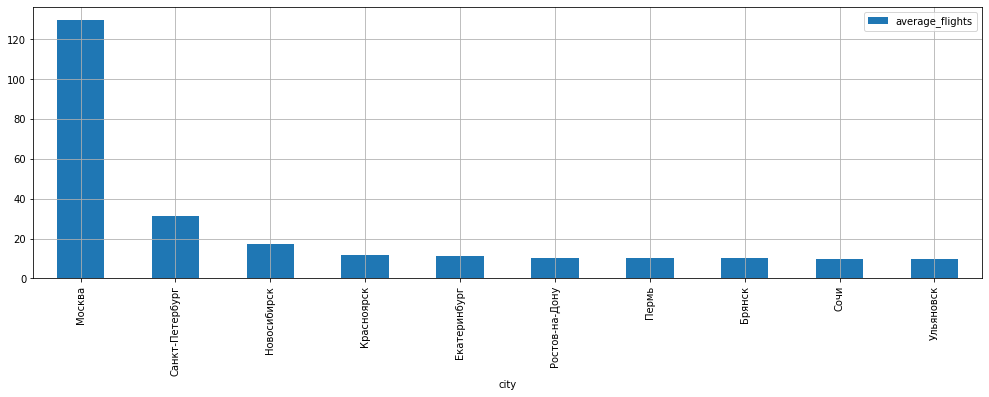

In [10]:
fig, ax = plt.subplots(figsize=(17,5))
city_flight_10.plot(kind='bar', x='city', grid=True, ax=ax)
plt.show()

На графике показано среднее количество рейсов, прибывающих в город  за день в сентябре 2018 года. Как видно, Москва лидирует, далее следует Санкт-Петербург. После - крупные города и столицы различный регионов. Москва - весьма очеивдно, так как является столицей, а так же в ней несколько международных аэропортов. Тоже касается и Санкт-Петербурга. Есть в выборке Сочи - не является столицей региона, но поппулярное туристическое направление. 



Изучим данные по всем имеющемся у нас городам. 

## Города и количество рейсов

In [11]:
(city_flight.sort_values(by='average_flights', ascending=False).reset_index(drop=True).style
                                     .bar(subset=['average_flights'], color='#B0E0E6', vmin=0, width=100)
                                     .set_caption('Среднее количество рейсов за день в сентябре 2018 года по всем городам')
)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10
8,Сочи,9.61
9,Ульяновск,9.58


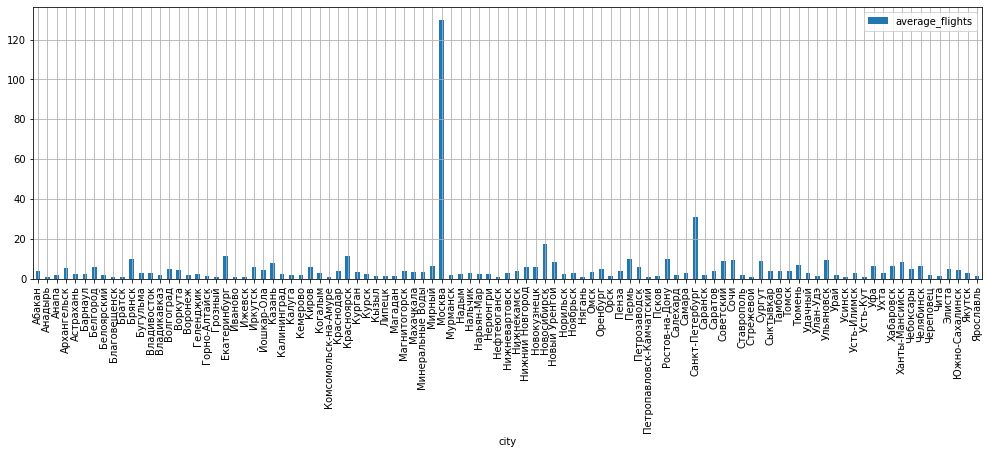

In [12]:
fig, ax = plt.subplots(figsize=(17,5))
city_flight.plot(kind='bar', x='city', grid=True, ax=ax)
plt.show()

Все города выборки и среднее кол-во прилетов в сентябре 2018 года. 

На графике видно, насколько Москва И Санкт-Петербург лидируют в данной выборке,  а так же города-столицы регионов. 


## Модели самолетов и количество рейсов

In [13]:
(model_flight.sort_values(by='flights_amount', ascending=False).reset_index(drop=True).style
                                     .bar(subset=['flights_amount'], color='#B0E0E6', vmin=0, width=100)
                                     .set_caption('Модели самолетов и количество рейсов')
)

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


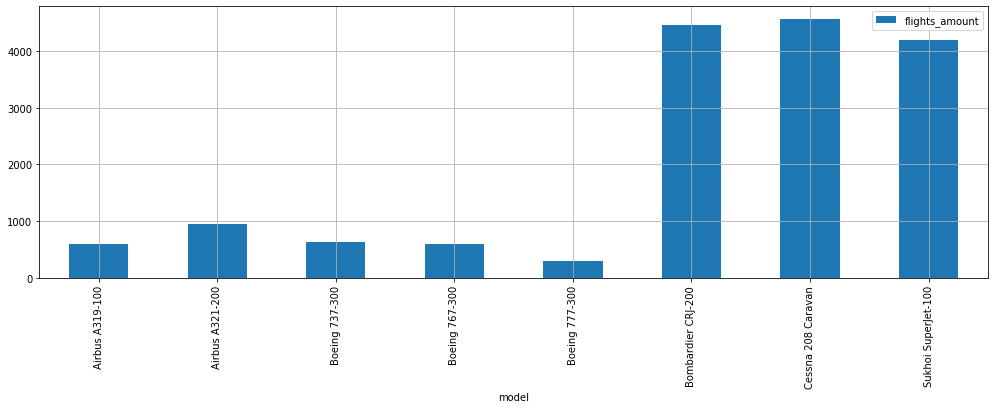

In [14]:
fig, ax = plt.subplots(figsize=(17,5))
model_flight.plot(kind='bar', x='model', grid=True, ax=ax)
plt.show()

Три модели самолетов с наибольшим кол-ом рейсов: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. 



## Средний спрос на билеты во время фестивалей 

In [15]:
ticket_festival = pd.read_csv('/datasets/query_last.csv')

Таблица ticket_festival:

week_number — номер недели;

ticket_amount — количество проданных билетов за неделю;

festival_week — есть ли на этой неделе фестиваль;

festival_name — название фестиваля.

In [16]:
ticket_festival.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [17]:
ticket_festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


С данными все в порядке, Nan пока оставим как есть, они нам не мешают. С их помощью можно будет проверить нашу гипотезу.


## Средний спрос на билеты во время фестивалей

И так, нам надо проверить гипотезу <b>средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время</b>. Для это разделим наш датафрейм на два. Недели, в которых проводились фастивали, и недели, которые без фествалей.


In [18]:
ticket_festival_weeks = ticket_festival[ticket_festival['festival_week'].notnull()]['ticket_amount'] 
#недели, когда фестивали проводились

In [19]:
not_ticket_festival_weeks = ticket_festival[ticket_festival['festival_week'].isnull()]['ticket_amount']
#недели, когда фестивали не проводились

Обратимся к  t-критерию Стьюдента, выборки не зависимы между собой. Пороговое значение alpha = .05

<b>Н0:</b> Средний спрос на билеты во время фестивалей <b>не отличается</b> от среднего спроса на билеты в обычное время

<b>Н1:</b> Средний спрос на билеты во время фестивалей <b>отличается</b> от среднего спроса на билеты в обычное время

In [20]:
alpha = .05

results = st.ttest_ind(
    ticket_festival_weeks,
    not_ticket_festival_weeks,
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Прирнимаем гипотиезу Н0: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. 



# Вывод

Изучены таблицы: model_flight и city_flight. Во всех таблицах тип данных корректный. 

Изучены данные по количеству перелетов в сентябре 2018 года. Больше всего рейсов в Москве, Санкт-Петербурге и Новосибирске. Модели самолетов, чаще прочих, совершающие рейсы: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.

Проверна гипотеза: средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Так оно и оказалось. Средний спрос на билеты в дни фестивалей такой же как и в обычные дни. 